In [6]:
#1pip install textblob

In [12]:
# for Importing the Dataset
import pandas as pd

# for calculating Polarity and Subjectivity
from textblob import TextBlob

# for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [13]:
# lets read the dataset
data = pd.read_csv('amazon_alexa.tsv', delimiter = '\t')

# lets check the shape of the dataset
data.shape

(3150, 5)

In [14]:
# lets check the head of the dataset
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [15]:
# Lets calculate the length of the Reviews
data['length'] = data['verified_reviews'].apply(len)

In [16]:
data['length']

0        13
1         9
2       195
3       172
4         5
       ... 
3145     50
3146    135
3147    441
3148    380
3149      4
Name: length, Length: 3150, dtype: int64

### Text Polarity

It is the expression that determines the sentimental aspect of an opinion. In textual data, the result of sentiment analysis can be determined for each entity in the sentence, document or sentence. The sentiment polarity can be determined as positive, negative and neutral.

In [17]:
# Lets calculate the Polarity of the Reviews
def get_polarity(text):
    textblob = TextBlob(str(text.encode('utf-8')))
    pol = textblob.sentiment.polarity
    return pol

# lets apply the function
data['polarity'] = data['verified_reviews'].apply(get_polarity)

In [18]:
data['polarity']

0       0.625000
1       0.875000
2      -0.100000
3       0.350000
4       0.000000
          ...   
3145    1.000000
3146    0.333333
3147    0.237662
3148    0.316667
3149    0.700000
Name: polarity, Length: 3150, dtype: float64

### Text Subjectivity

In natural language, subjectivity refers to expression of opinions, evaluations, feelings, and speculations and thus incorporates sentiment. Subjective text is further classified with sentiment or polarity.

In [19]:
# Lets calculate the Subjectvity of the Reviews
def get_subjectivity(text):
    textblob = TextBlob(str(text.encode('utf-8')))
    subj = textblob.sentiment.subjectivity
    return subj

# lets apply the Function
data['subjectivity'] = data['verified_reviews'].apply(get_subjectivity)

In [20]:
data['subjectivity']

0       0.600000
1       0.800000
2       0.512500
3       0.450000
4       0.000000
          ...   
3145    1.000000
3146    0.452381
3147    0.533766
3148    0.632099
3149    0.600000
Name: subjectivity, Length: 3150, dtype: float64

In [21]:
## lets summarize the Newly Created Features
data[['length','polarity','subjectivity']].describe()

,length,polarity,subjectivity
count,3150.000000,3150.000000,3150.000000
mean,132.049524,0.349792,0.528922
std,182.099952,0.303362,0.256324
min,1.000000,-1.000000,0.000000
25%,30.000000,0.123852,0.419196
50%,74.000000,0.350000,0.585000
75%,165.000000,0.533333,0.695486
max,2851.000000,1.000000,1.000000


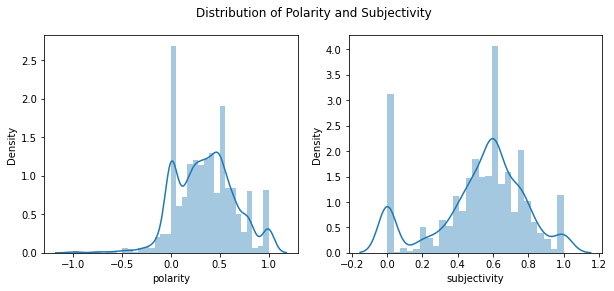

In [22]:
## Visualizing Polarity and Subjectivity

plt.rcParams['figure.figsize'] = (10, 4)

plt.subplot(1, 2, 1)
sns.distplot(data['polarity'])

plt.subplot(1, 2, 2)
sns.distplot(data['subjectivity'])

plt.suptitle('Distribution of Polarity and Subjectivity')
plt.show()

In [ ]:
# lets check relation between Polarity and Subjectivity

sns.scatterplot(data['polarity'], data['subjectivity'])
plt.title('Polarity vs Subjectivity')
plt.show()